In [2]:
from Sims import Simulation as sim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Estado Inicial Encendido

In [3]:
state = 'on'
file = f'.tests/test_double_time_distribution_on'

toy = sim(
            TMG=20, 
            cells=5000, 
            file=file, 
            state=state
            )
            
toy.get_time_distribution(mode='double')

 86%|████████▌ | 4285/5000 [27:16<05:03,  2.36it/s]  

In [ ]:
df_on = pd.read_csv(f'{file}.csv', delimiter=',')
df_on

,Cell,On_Time,Off_Time,Promoter_State
0,1,177.1727,0.0000,off
1,1,177.1727,1670.4577,off
2,2,56.4046,0.0000,off
3,2,56.4046,288.3413,off
4,3,2473.2266,0.0000,off
...,...,...,...,...
9995,4998,472.5119,727.9714,off
9996,4999,4717.4271,0.0000,off
9997,4999,4717.4271,4942.2035,off
9998,5000,2021.1633,0.0000,off


### Células encendidas que se apagan

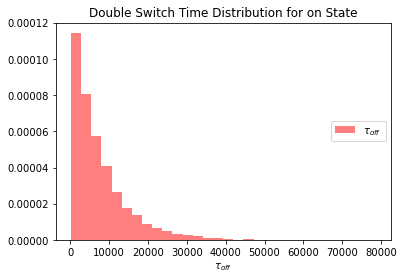

In [ ]:
plt.hist(df_on['Off_Time'].unique()[1::], bins=30, density=True, color='red', alpha=0.5, label=r'$\tau_{off}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{off}$');
plt.title(f'Double Switch Time Distribution for {state} State');


### Células que una vez se apagan, se encienden

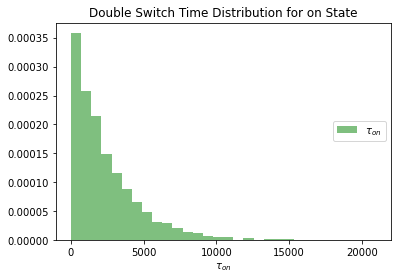

In [ ]:
plt.hist(df_on['On_Time'].unique(), bins=30, density=True, color='green', alpha=0.5, label=r'$\tau_{on}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{on}$');
plt.title(f'Double Switch Time Distribution for {state} State');

## Estado Inicial Apagado

In [ ]:
state = 'off'
file = f'.tests/test_double_time_distribution_off'

toy = sim(
            TMG=20, 
            cells=5000, 
            file=file, 
            state=state
            )
            
toy.get_time_distribution(mode='double')

100%|██████████| 2500/2500 [05:00<00:00,  8.32it/s]


In [ ]:
df_off = pd.read_csv(f'{file}.csv', delimiter=',')

### Células apagadas que se encienden

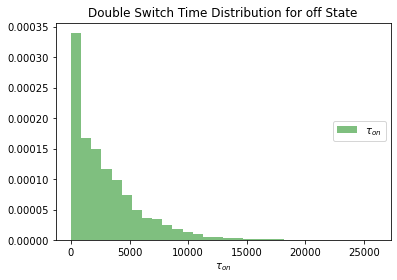

In [ ]:
plt.hist(df_off['On_Time'].unique()[::], bins=30, density=True, color='green', alpha=0.5, label=r'$\tau_{on}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{on}$');
plt.title(f'Double Switch Time Distribution for {state} State');

### Células que una vez encendidas, se apagan

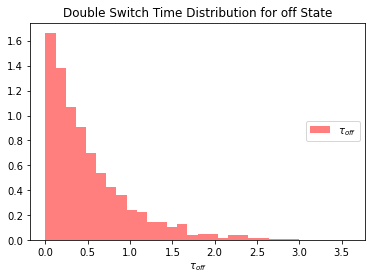

In [ ]:
plt.hist(df_off['Off_Time'].unique()[1::], bins=30, density=True, color='red', alpha=0.5, label=r'$\tau_{off}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{off}$');
plt.title(f'Double Switch Time Distribution for {state} State');

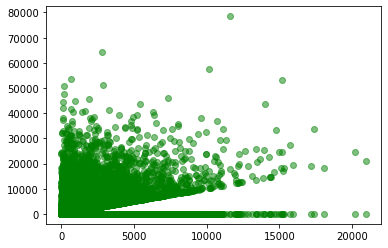

In [ ]:
plt.scatter(df_on['On_Time'], df_on['Off_Time'], color='green', alpha=0.5, label=r'$\tau_{on}$');
# df_on['On_Time'].unique().shape
# df_off['Off_Time'].unique().shape

In [ ]:
    # r_corr_on = np.corrcoef(df_on_ontime_fixed, df_on_offtime_fixed)[0][1]
    # r_corr_off = np.corrcoef(df_off_ontime_fixed, df_off_offtime_fixed)[0][1]
    # df_on_offtime_fixed = [float(df_on_offtime[i]) for i in range(len(df_on_offtime))]
    # df_on_ontime_fixed = [float(df_on_ontime[i]) - float(df_on_offtime[i]) for i in range(len(df_on_ontime))]

    # df_off_ontime_fixed = [float(df_off_ontime[i]) for i in range(len(df_off_ontime))]
    # df_off_offtime_fixed = [float(df_off_offtime[i]) - float(df_off_ontime[i]) for i in range(len(df_off_offtime))]